In [1]:
import sys

import numpy as np
import pandas as pd

sys.path.append("../modules/")

from plot import plot_confusion_matrix_a

from _pdf_representation import ToPdfRepresentation

In [2]:
from rede import NeuralNet

In [3]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score

In [4]:
precision = make_scorer(precision_score, average='macro')
score_function = accuracy_score

In [5]:
X_train = np.load('../../data/X_train_res_ren.npy')
y_train = np.load('../../data/y_train_res_ren.npy')

X_test = np.load('../../data/X_test_res_ren.npy')
y_test = np.load('../../data/y_test_res_ren.npy')

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2102, 13)
(2102, 1)
(51, 13)
(51, 1)


In [7]:
print(X_test[0], y_test[0])
print(X_test[33], y_test[33])

[0.22606019 0.44490489 0.37320462 0.53915166 0.34203395 0.33497189
 0.35229816 0.43263543 0.36444151 0.54558077 0.29992757 0.31700858
 0.5461984 ] [0.]
[0.23221614 0.4626591  0.41198898 0.57151645 0.35513783 0.36662264
 0.39442896 0.46304687 0.40709135 0.58414607 0.35666556 0.38591786
 0.57040699] [1.]


In [8]:
def test_intime_pdf_representation(X_train, y_train, X_test, y_test, mod, score_function):

    # generate pdf representation for the train data
    to_pdf = ToPdfRepresentation(16, 1)
    max_rep_0_inst_0, max_rep_1_inst_1 = to_pdf.fit(X_train, y_train)
    X_train = to_pdf.transform(X_train)
        
    print("Máximo rep_0_inst_0")
    print(max_rep_0_inst_0, "\n")
    print("Máximo rep_1_inst_1")
    print(max_rep_1_inst_1, "\n")
    
    # get the predictors after generate pdf representation
    # then extract the data from the df_aux_1 dataframe
    # generate pdf representation to test data

    X_test = to_pdf.transform(X_test)
    print(X_test[0][0:13])
    print(X_test[0][13:26], "\n")
    print(X_test[33][0:13])
    print(X_test[33][13:26], "\n")
       
    print("Número de amostras da classe 1.0: {}".format(y_train[y_train == 1.0].shape[0]))
    print("Número de amostras da classe 0.0: {}".format(y_train[y_train == 0.0].shape[0]))
    # fit the model to the train data
    validation_data = (X_test, y_test)
    mod.fit(X_train, y_train, validation_data)
    
    
    # make the prediction to X_test
    predict = mod.predict(X_train)

    plot_confusion_matrix_a(y_train,
                            predict,
                            classes=['NS', 'S'],
                            title='Matriz de Confusão')
    
    # make the prediction to X_test
    predict = mod.predict(X_test)

    plot_confusion_matrix_a(y_test,
                            predict,
                            classes=['NS', 'S'],
                            title='Matriz de Confusão')

    score = score_function(y_true=y_test,
                           y_pred=predict)
    loss = 1 - score
    print(loss)

  0%|          | 1/2000 [00:00<04:20,  7.69it/s]

0.4996892206386314
0.5596641740323454
0.4996892206386314
0.5596641740323454
Máximo rep_0_inst_0
[ 6.8915014  8.639815   9.461699  12.389131   7.631168   7.344924
  7.101031   8.648237   8.954458  10.824094   8.337469   8.789144
 11.096219 ] 

Máximo rep_1_inst_1
[ 5.798144   8.959435  10.665694  13.104824   7.5501246  7.3242154
  7.8877106  9.155136   9.875976  11.527685   7.562115   9.813853
 12.501706 ] 

0.4857709288202277
0.572710324564381
[0.97354581 0.97754407 0.99202353 0.75004534 0.94242845 0.98774491
 0.99839951 0.9933785  0.98517779 0.75234593 0.96346894 0.96675706
 0.78035271]
[0.19424028 0.45962125 0.19584465 0.97161906 0.15034216 0.11379392
 0.1598726  0.32010583 0.22632534 0.97239859 0.09551905 0.3499629
 0.92539762] 

[0.98092809 0.94731276 0.91851103 0.57479462 0.96639256 0.99960664
 0.96488391 0.95073521 0.89851418 0.57403977 0.99255268 0.79521545
 0.66557155]
[0.22184953 0.56697671 0.43920691 0.99855213 0.19953504 0.22740466
 0.34930948 0.50234074 0.49234942 0.9978310

100%|██████████| 2000/2000 [05:19<00:00,  6.31it/s]


0.5686274509803921


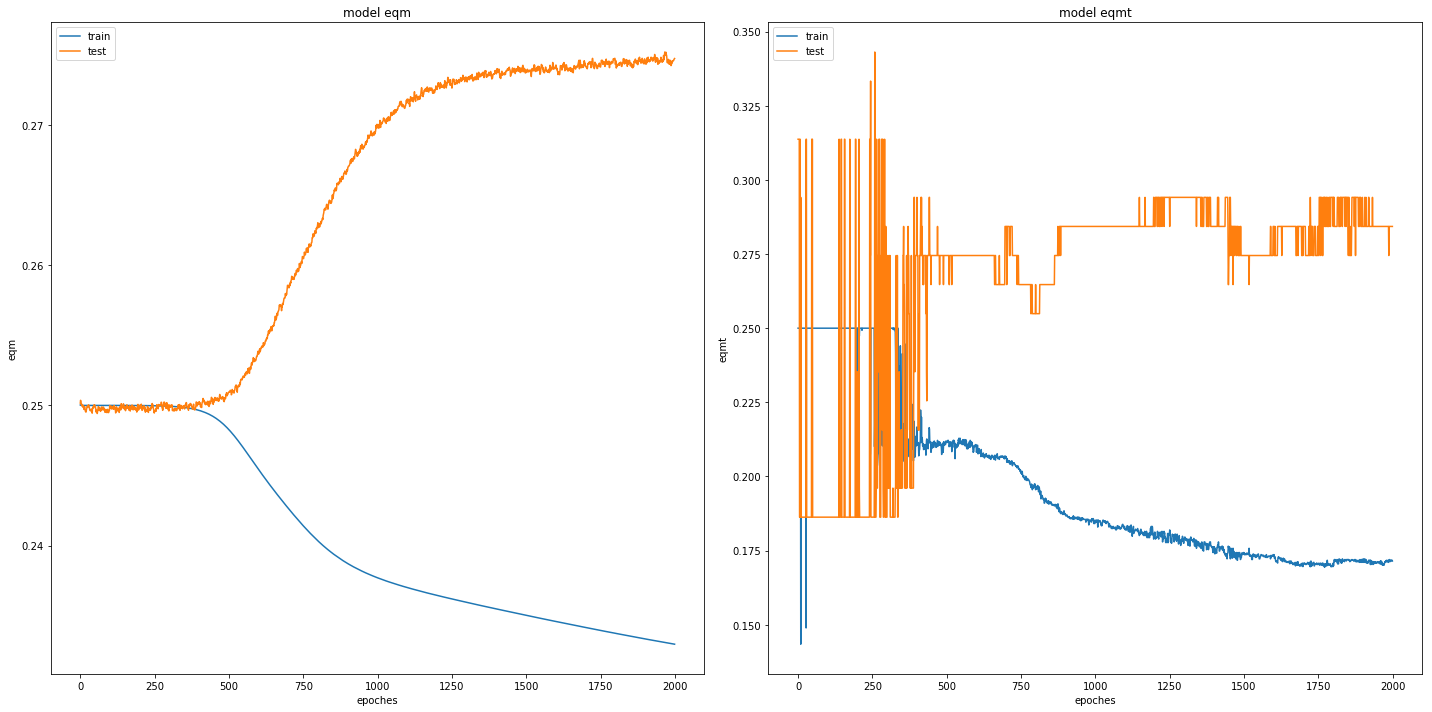

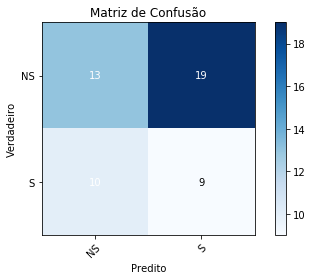

In [9]:
mlp = NeuralNet()

test_intime_pdf_representation(X_train, y_train, X_test, y_test,
                               mlp,
                               score_function)